In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the output.txt

n_lines = 20
with open('output2.txt', 'r') as f:
    cnt = 0
    output = ""
    while cnt < n_lines:
        output += f.readline()
        cnt+=1
        
print(output)

0; 27.00
0; 28.00
1; 27.00
1; 27.00
2; 28.00
2; 29.00
3; 28.00
5; 28.00
15; 27.00
26; 28.00
37; 29.00
50; 28.00
61; 26.00
72; 29.00
83; 28.00
95; 28.00
106; 27.00
119; 27.00
132; 27.00
144; 27.00



In [3]:
# first rows are artefacts, skipping them
skiprows=20
df = pd.read_csv('output2.txt', sep=';', header=None, skiprows=skiprows)
df.columns = ['t', 'y']
                    
df.head(10)

,t,y
0,156,27.0
1,168,27.0
2,182,28.0
3,194,27.0
4,206,27.0
5,219,27.0
6,231,29.0
7,244,28.0
8,257,29.0
9,269,28.0


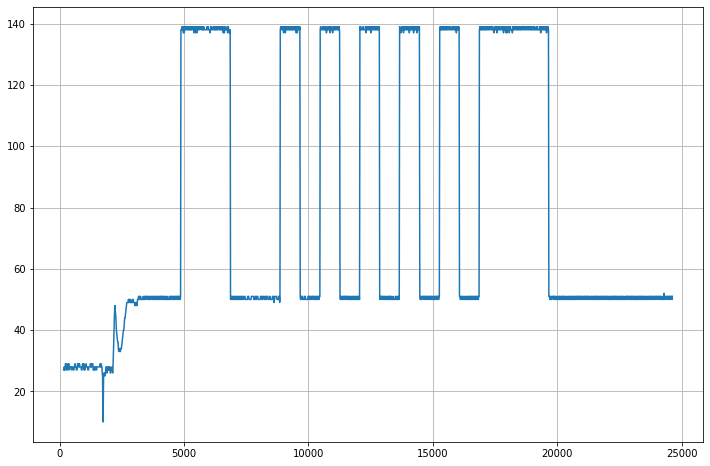

In [4]:
fig = plt.figure(figsize=(12,8))
plt.plot(df.t, df.y)
plt.grid()
plt.show()

### Inspecting the 2 seconds configuration state

In [5]:
# inspecting the configuration state

start = 0 # ms
end   = start+2000 # ms

In [6]:
df[(df.t>start) & (df.t<end)].head()

,t,y
0,156,27.0
1,168,27.0
2,182,28.0
3,194,27.0
4,206,27.0


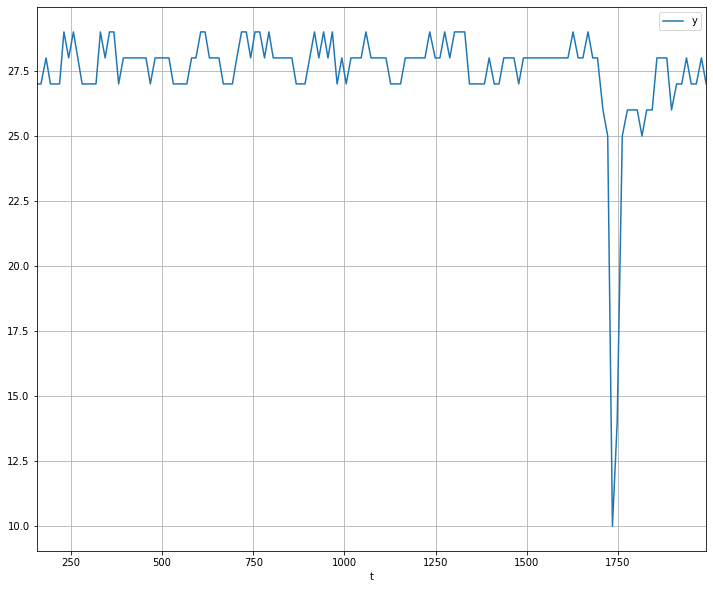

In [7]:
# try to see when we have the state change 0->1
df[(df.t>start) & (df.t<end)].plot('t','y', figsize=(12, 10))
plt.grid()
plt.show()

let's try to get closer... 

In [8]:
# let's see when we have the change 0->1

start = 180        # ms
end   = start+2000 # ms

df[(df.t>start) & (df.t<end)].head(10)

,t,y
2,182,28.0
3,194,27.0
4,206,27.0
5,219,27.0
6,231,29.0
7,244,28.0
8,257,29.0
9,269,28.0
10,281,27.0
11,293,27.0


In [9]:
# ok, around t=194 ms

In [10]:
# let's see now if it lasts exactly 2000 ms
t_0 = 194 
delta = 2000       # one open led for 2 seconds

In [11]:
# check if we see the change 1->0 in the tail
df[(df.t>=t_0) & (df.t<=t_0+delta)].tail()

,t,y
151,2127,26.0
152,2141,28.0
153,2154,31.0
154,2167,35.0
155,2182,40.0


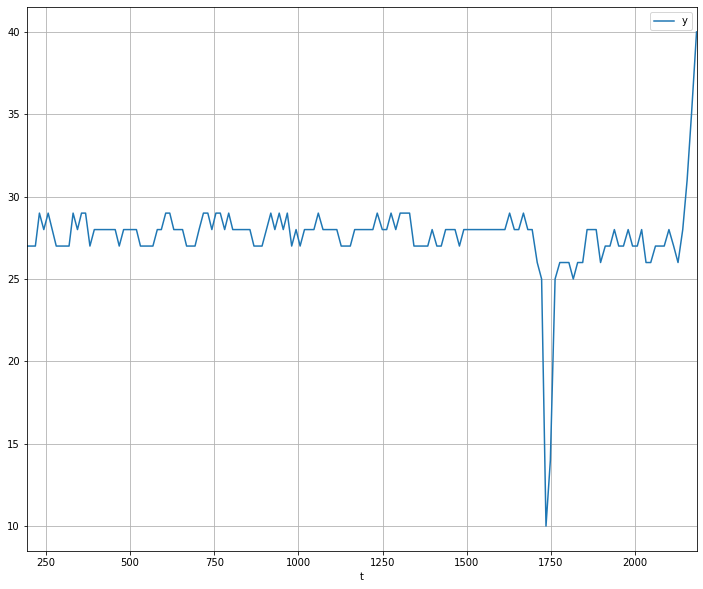

In [12]:
df[(df.t>=t_0) & (df.t<=t_0+delta)].plot('t','y', figsize=(12, 10))
plt.grid()
plt.show()

In [13]:
# we don't se the state change 1->0 after 2000 ms
# so let's try to get a different delta (i.e. 2020ms)
delta=2020

In [14]:
# let's see the tail
df[(df.t>=t_0) & (df.t<=t_0+delta)]

,t,y
3,194,27.0
4,206,27.0
5,219,27.0
6,231,29.0
7,244,28.0
8,257,29.0
9,269,28.0
10,281,27.0
11,293,27.0
12,306,27.0


##### Ok, the change is around 2195 ms

In [15]:
2195 - 194

2001

##### OK! we're almost there in terms of milliseconds, in the sense that the configuration state lasts 2001 ~ 2000 ms

In [16]:
delta = 2001

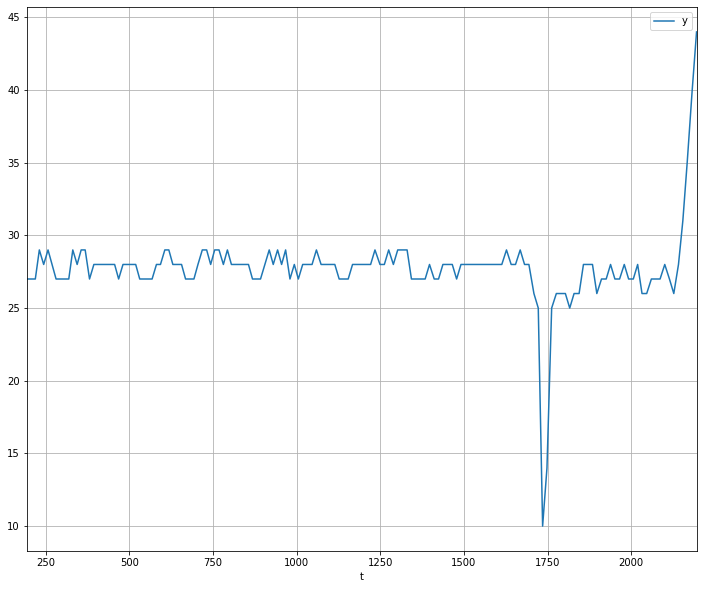

In [17]:
df[(df.t>=t_0) & (df.t<=t_0+delta)].plot('t','y', figsize=(12, 10))
plt.grid()
plt.show()

In [18]:
df

,t,y
0,156,27.0
1,168,27.0
2,182,28.0
3,194,27.0
4,206,27.0
5,219,27.0
6,231,29.0
7,244,28.0
8,257,29.0
9,269,28.0


### Real Time Analysis

In [76]:
file = open("output3.txt")
content = file.read()
content = content.replace("=~=~=~=~=~=~=~=~=~=~=~= PuTTY log 2020.05.15 22:29:21 =~=~=~=~=~=~=~=~=~=~=~=\n0\n\n", "")
content
file.close()
file = open("output4.csv", "w")
file.write(content)
file.close()

In [77]:
df = pd.read_csv("output4.csv", sep = ";")
df.head(10)
df.dropna(inplace = True)
df = df[3:]
df.reset_index(inplace = True)
df.columns = ["index", "t", "y"]
df.head(10)

,index,t,y
0,3,79834,5.0
1,4,79835,5.0
2,5,79835,4.0
3,6,79836,4.0
4,7,79836,4.0
5,8,79837,4.0
6,9,79837,3.0
7,10,79838,3.0
8,11,79839,3.0
9,12,79839,3.0


In [78]:
import numpy as np

rest_state = True
configuration_state = False
loiter_state = False
receiving_state = False
conclusion_state = False

zero_setting_time = df["t"][0] + 1000
zero_list = df[df["t"] <= zero_setting_time]
nominal_zero = np.mean(zero_list)["y"]
zero_thr = 2*nominal_zero

df_real_time = df[df["t"] > zero_setting_time]
df_real_time.reset_index(inplace = True)
ratio = 0.5
cumulative_mean = nominal_zero
loiter_t = 2000
signal_delta = 200

message = ""
final_message = ""


for i in range(0, len(df_real_time)):
    
    y = df_real_time["y"][i]
    t = df_real_time["t"][i]
    
    if rest_state:
        print("rest state", y, t)
        if y > zero_thr:
            thr = zero_thr
            configuration_state = True
            rest_state = False

    if configuration_state:
        print("configuration state", y, t, thr, cumulative_mean)
        if y < thr:
            loiter_state = True
            configuration_state = False
            loiter_start = t
        if configuration_state:
            cumulative_mean = (y + cumulative_mean)/2
            thr = cumulative_mean*ratio
        
    if loiter_state:
        print("loiter state", y, t)
        if t >= loiter_start + loiter_t:
            loiter_state = False
            receiving_state = True
            t_0 = t
            cnt = 1
            n_peaks = 0
            n_gaps = 0
    
    if receiving_state:
        print("receiving state", y, t, t_0)
        if y >= thr:
            n_peaks += 1
        else:
            n_gaps += 1
        if t >= t_0 + cnt*200:
            print(n_peaks, n_gaps, t)
            cnt += 1
            if n_peaks >= n_gaps:
                message = message + "1"
            else:
                if message[-10:] == "1111111111" or message[-10:] == "0000000000":
                    message = message[:-10]
                    receiving_state = False
                    conclusion_state = True
                    break
                message = message + "0"
            n_peaks = 0
            n_gaps = 0
    
if conclusion_state:
    print("conclusion state", y, t)
    for idx in range(len(message)//4):
        n1 = 0; n0 = 0
        for bit in message[idx*4:(idx+1)*4]:
            if bit == "1":
                n1 += 1
            else:
                n0 += 1
        if n1 >= n0:
            final_message = final_message + "1"
        else:
            final_message = final_message + "0"

rest state 4.0 81624
rest state 4.0 81625
rest state 4.0 81626
rest state 3.0 81626
rest state 3.0 81627
rest state 3.0 81627
rest state 3.0 81628
rest state 3.0 81629
rest state 4.0 81629
rest state 4.0 81630
rest state 4.0 81630
rest state 4.0 81631
rest state 5.0 81632
rest state 5.0 81632
rest state 5.0 81633
rest state 5.0 81633
rest state 5.0 81634
rest state 4.0 81635
rest state 4.0 81635
rest state 3.0 81636
rest state 3.0 81636
rest state 3.0 81637
rest state 3.0 81637
rest state 3.0 81638
rest state 4.0 81639
rest state 4.0 81639
rest state 4.0 81640
rest state 4.0 81640
rest state 4.0 81641
rest state 5.0 81642
rest state 4.0 81642
rest state 5.0 81643
rest state 4.0 81643
rest state 4.0 81644
rest state 4.0 81645
rest state 3.0 81645
rest state 3.0 81646
rest state 3.0 81646
rest state 3.0 81647
rest state 3.0 81648
rest state 3.0 81648
rest state 4.0 81649
rest state 4.0 81649
rest state 4.0 81650
rest state 4.0 81651
rest state 5.0 81651
rest state 5.0 81652
rest state 5.

rest state 5.0 81942
rest state 5.0 81943
rest state 4.0 81943
rest state 4.0 81944
rest state 4.0 81944
rest state 3.0 81945
rest state 3.0 81945
rest state 3.0 81946
rest state 3.0 81947
rest state 3.0 81947
rest state 4.0 81948
rest state 4.0 81948
rest state 4.0 81949
rest state 4.0 81950
rest state 4.0 81950
rest state 5.0 81951
rest state 5.0 81951
rest state 5.0 81952
rest state 5.0 81953
rest state 4.0 81953
rest state 4.0 81954
rest state 4.0 81954
rest state 3.0 81955
rest state 3.0 81956
rest state 3.0 81956
rest state 3.0 81957
rest state 3.0 81957
rest state 4.0 81958
rest state 3.0 81959
rest state 4.0 81959
rest state 4.0 81960
rest state 4.0 81960
rest state 5.0 81961
rest state 5.0 81963
rest state 5.0 81963
rest state 4.0 81964
rest state 4.0 81964
rest state 4.0 81965
rest state 4.0 81965
rest state 3.0 81966
rest state 3.0 81967
rest state 3.0 81967
rest state 3.0 81968
rest state 3.0 81968
rest state 4.0 81969
rest state 4.0 81970
rest state 4.0 81970
rest state 4.

rest state 4.0 82279
rest state 4.0 82279
rest state 4.0 82280
rest state 4.0 82281
rest state 4.0 82281
rest state 4.0 82282
rest state 5.0 82282
rest state 4.0 82283
rest state 4.0 82284
rest state 4.0 82284
rest state 3.0 82285
rest state 3.0 82285
rest state 3.0 82286
rest state 3.0 82287
rest state 3.0 82287
rest state 3.0 82288
rest state 4.0 82288
rest state 4.0 82289
rest state 4.0 82289
rest state 4.0 82290
rest state 5.0 82291
rest state 5.0 82291
rest state 5.0 82292
rest state 5.0 82292
rest state 5.0 82293
rest state 4.0 82294
rest state 4.0 82294
rest state 4.0 82295
rest state 3.0 82295
rest state 3.0 82296
rest state 3.0 82297
rest state 3.0 82297
rest state 3.0 82298
rest state 4.0 82298
rest state 4.0 82299
rest state 4.0 82300
rest state 4.0 82300
rest state 4.0 82301
rest state 5.0 82301
rest state 5.0 82302
rest state 5.0 82304
rest state 4.0 82304
rest state 4.0 82305
rest state 4.0 82305
rest state 3.0 82306
rest state 3.0 82307
rest state 3.0 82307
rest state 3.

rest state 5.0 82641
rest state 4.0 82642
rest state 5.0 82642
rest state 4.0 82643
rest state 4.0 82644
rest state 4.0 82644
rest state 3.0 82646
rest state 3.0 82646
rest state 3.0 82647
rest state 3.0 82648
rest state 3.0 82648
rest state 4.0 82649
rest state 4.0 82649
rest state 4.0 82650
rest state 4.0 82651
rest state 5.0 82651
rest state 5.0 82652
rest state 5.0 82652
rest state 5.0 82653
rest state 4.0 82654
rest state 4.0 82654
rest state 4.0 82655
rest state 4.0 82655
rest state 3.0 82656
rest state 3.0 82656
rest state 3.0 82657
rest state 3.0 82658
rest state 4.0 82658
rest state 4.0 82659
rest state 4.0 82659
rest state 4.0 82660
rest state 4.0 82661
rest state 4.0 82661
rest state 5.0 82662
rest state 5.0 82662
rest state 4.0 82663
rest state 4.0 82664
rest state 4.0 82664
rest state 4.0 82665
rest state 3.0 82665
rest state 3.0 82666
rest state 3.0 82667
rest state 3.0 82667
rest state 3.0 82668
rest state 4.0 82668
rest state 4.0 82669
rest state 4.0 82670
rest state 4.

rest state 4.0 82950
rest state 4.0 82950
rest state 4.0 82951
rest state 5.0 82951
rest state 5.0 82952
rest state 5.0 82953
rest state 5.0 82953
rest state 4.0 82954
rest state 4.0 82954
rest state 4.0 82955
rest state 3.0 82956
rest state 3.0 82956
rest state 3.0 82957
rest state 3.0 82957
rest state 4.0 82958
rest state 4.0 82959
rest state 4.0 82959
rest state 4.0 82960
rest state 4.0 82960
rest state 4.0 82961
rest state 5.0 82962
rest state 5.0 82962
rest state 4.0 82963
rest state 4.0 82963
rest state 4.0 82964
rest state 4.0 82964
rest state 3.0 82965
rest state 3.0 82966
rest state 3.0 82966
rest state 3.0 82967
rest state 3.0 82967
rest state 3.0 82968
rest state 4.0 82969
rest state 4.0 82969
rest state 4.0 82970
rest state 4.0 82970
rest state 5.0 82971
rest state 5.0 82972
rest state 5.0 82972
rest state 5.0 82973
rest state 4.0 82973
rest state 4.0 82974
rest state 4.0 82975
rest state 3.0 82975
rest state 3.0 82976
rest state 3.0 82976
rest state 3.0 82977
rest state 4.

rest state 4.0 83264
rest state 4.0 83264
rest state 4.0 83265
rest state 3.0 83265
rest state 4.0 83266
rest state 3.0 83267
rest state 3.0 83267
rest state 3.0 83268
rest state 4.0 83268
rest state 4.0 83269
rest state 4.0 83270
rest state 5.0 83270
rest state 5.0 83271
rest state 5.0 83271
rest state 5.0 83272
rest state 5.0 83272
rest state 4.0 83273
rest state 4.0 83274
rest state 4.0 83274
rest state 3.0 83275
rest state 3.0 83275
rest state 3.0 83276
rest state 3.0 83277
rest state 3.0 83277
rest state 4.0 83278
rest state 4.0 83278
rest state 4.0 83279
rest state 4.0 83280
rest state 4.0 83280
rest state 4.0 83281
rest state 5.0 83281
rest state 4.0 83282
rest state 4.0 83283
rest state 4.0 83283
rest state 4.0 83284
rest state 3.0 83284
rest state 3.0 83286
rest state 3.0 83287
rest state 3.0 83287
rest state 3.0 83288
rest state 4.0 83288
rest state 4.0 83289
rest state 4.0 83290
rest state 4.0 83290
rest state 5.0 83291
rest state 5.0 83291
rest state 5.0 83292
rest state 5.

rest state 4.0 83623
rest state 4.0 83624
rest state 3.0 83624
rest state 3.0 83625
rest state 3.0 83625
rest state 3.0 83627
rest state 3.0 83628
rest state 4.0 83628
rest state 4.0 83629
rest state 3.0 83629
rest state 4.0 83630
rest state 4.0 83631
rest state 5.0 83631
rest state 5.0 83632
rest state 4.0 83632
rest state 4.0 83633
rest state 4.0 83634
rest state 4.0 83634
rest state 4.0 83635
rest state 4.0 83635
rest state 3.0 83636
rest state 3.0 83636
rest state 3.0 83637
rest state 4.0 83638
rest state 4.0 83638
rest state 4.0 83639
rest state 4.0 83639
rest state 5.0 83640
rest state 4.0 83641
rest state 5.0 83641
rest state 4.0 83642
rest state 4.0 83642
rest state 4.0 83643
rest state 4.0 83644
rest state 4.0 83644
rest state 3.0 83645
rest state 3.0 83645
rest state 3.0 83646
rest state 3.0 83647
rest state 3.0 83647
rest state 4.0 83648
rest state 4.0 83648
rest state 4.0 83649
rest state 4.0 83650
rest state 5.0 83650
rest state 5.0 83651
rest state 5.0 83651
rest state 5.

configuration state 33.0 83872 16.492217779617825 32.98443555923565
configuration state 33.0 83873 16.496108889808912 32.992217779617825
configuration state 32.0 83874 16.498054444904454 32.99610888980891
configuration state 32.0 83874 16.249027222452227 32.498054444904454
configuration state 32.0 83875 16.124513611226114 32.24902722245223
configuration state 32.0 83876 16.062256805613057 32.124513611226114
configuration state 32.0 83876 16.03112840280653 32.06225680561306
configuration state 32.0 83877 16.015564201403265 32.03112840280653
configuration state 32.0 83877 16.007782100701633 32.015564201403265
configuration state 33.0 83878 16.003891050350816 32.00778210070163
configuration state 33.0 83879 16.251945525175408 32.503891050350816
configuration state 33.0 83879 16.375972762587704 32.75194552517541
configuration state 33.0 83880 16.437986381293854 32.87597276258771
configuration state 33.0 83881 16.468993190646927 32.937986381293854
configuration state 33.0 83881 16.484496595

configuration state 33.0 84022 16.484435797428915 32.96887159485783
configuration state 33.0 84023 16.492217898714458 32.984435797428915
configuration state 32.0 84023 16.49610894935723 32.99221789871446
configuration state 32.0 84024 16.248054474678614 32.49610894935723
configuration state 32.0 84025 16.124027237339305 32.24805447467861
configuration state 32.0 84025 16.062013618669653 32.124027237339305
configuration state 32.0 84026 16.031006809334826 32.06201361866965
configuration state 32.0 84027 16.015503404667413 32.031006809334826
configuration state 32.0 84027 16.007751702333707 32.01550340466741
configuration state 32.0 84028 16.003875851166853 32.00775170233371
configuration state 32.0 84029 16.001937925583427 32.00387585116685
configuration state 33.0 84029 16.000968962791713 32.00193792558343
configuration state 33.0 84030 16.25048448139586 32.50096896279172
configuration state 33.0 84030 16.37524224069793 32.75048448139586
configuration state 33.0 84031 16.43762112034896

configuration state 33.0 84121 16.437743190661536 32.87548638132307
configuration state 33.0 84121 16.468871595330768 32.937743190661536
configuration state 33.0 84122 16.484435797665384 32.96887159533077
configuration state 33.0 84123 16.492217898832692 32.984435797665384
configuration state 32.0 84123 16.496108949416346 32.99221789883269
configuration state 32.0 84124 16.248054474708173 32.496108949416346
configuration state 32.0 84125 16.124027237354085 32.24805447470817
configuration state 32.0 84125 16.062013618677042 32.124027237354085
configuration state 32.0 84126 16.03100680933852 32.06201361867704
configuration state 32.0 84126 16.01550340466926 32.03100680933852
configuration state 32.0 84127 16.00775170233463 32.01550340466926
configuration state 32.0 84128 16.003875851167315 32.00775170233463
configuration state 32.0 84128 16.001937925583658 32.003875851167315
configuration state 33.0 84129 16.00096896279183 32.00193792558366
configuration state 33.0 84130 16.2504844813959

configuration state 32.0 84237 16.015503166250653 32.031006332501306
configuration state 32.0 84237 16.007751583125327 32.01550316625065
configuration state 32.0 84238 16.003875791562663 32.00775158312533
configuration state 33.0 84239 16.00193789578133 32.00387579156266
configuration state 33.0 84239 16.250968947890666 32.50193789578133
configuration state 33.0 84240 16.375484473945335 32.75096894789067
configuration state 33.0 84240 16.437742236972667 32.875484473945335
configuration state 33.0 84241 16.468871118486334 32.93774223697267
configuration state 33.0 84242 16.484435559243167 32.968871118486334
configuration state 33.0 84242 16.492217779621583 32.98443555924317
configuration state 32.0 84243 16.49610888981079 32.99221777962158
configuration state 32.0 84244 16.248054444905396 32.49610888981079
configuration state 32.0 84244 16.124027222452696 32.24805444490539
configuration state 32.0 84245 16.062013611226348 32.124027222452696
configuration state 32.0 84246 16.031006805613

configuration state 33.0 84353 16.48440528008713 32.96881056017426
configuration state 33.0 84353 16.492202640043566 32.98440528008713
configuration state 32.0 84354 16.496101320021783 32.992202640043566
configuration state 32.0 84355 16.24805066001089 32.49610132002178
configuration state 32.0 84355 16.124025330005445 32.24805066001089
configuration state 32.0 84356 16.062012665002722 32.124025330005445
configuration state 32.0 84356 16.031006332501363 32.062012665002726
configuration state 32.0 84357 16.01550316625068 32.03100633250136
configuration state 32.0 84358 16.00775158312534 32.01550316625068
configuration state 32.0 84358 16.00387579156267 32.00775158312534
configuration state 33.0 84359 16.001937895781335 32.00387579156267
configuration state 33.0 84360 16.25096894789067 32.50193789578134
configuration state 33.0 84360 16.375484473945335 32.75096894789067
configuration state 33.0 84361 16.437742236972667 32.875484473945335
configuration state 33.0 84361 16.468871118486334 

configuration state 32.0 84468 16.001907407773608 32.003814815547216
configuration state 33.0 84468 16.000953703886804 32.00190740777361
configuration state 33.0 84469 16.250476851943404 32.50095370388681
configuration state 33.0 84469 16.375238425971702 32.750476851943404
configuration state 33.0 84470 16.43761921298585 32.8752384259717
configuration state 33.0 84471 16.468809606492925 32.93761921298585
configuration state 33.0 84471 16.484404803246463 32.968809606492925
configuration state 33.0 84472 16.49220240162323 32.98440480324646
configuration state 32.0 84473 16.496101200811616 32.99220240162323
configuration state 32.0 84473 16.248050600405808 32.496101200811616
configuration state 32.0 84474 16.124025300202902 32.248050600405804
configuration state 32.0 84475 16.06201265010145 32.1240253002029
configuration state 32.0 84475 16.031006325050726 32.06201265010145
configuration state 32.0 84476 16.015503162525363 32.031006325050726
configuration state 32.0 84476 16.0077515812626

configuration state 33.0 84600 16.312740329624035 32.62548065924807
configuration state 33.0 84601 16.406370164812017 32.812740329624035
configuration state 33.0 84601 16.45318508240601 32.90637016481202
configuration state 33.0 84602 16.476592541203004 32.95318508240601
configuration state 32.0 84602 16.488296270601502 32.976592541203004
configuration state 32.0 84603 16.24414813530075 32.4882962706015
configuration state 32.0 84604 16.122074067650374 32.24414813530075
configuration state 31.0 84604 16.061037033825187 32.122074067650374
configuration state 32.0 84605 15.780518516912593 31.561037033825187
configuration state 32.0 84606 15.890259258456297 31.780518516912593
configuration state 32.0 84606 15.945129629228148 31.890259258456297
configuration state 32.0 84608 15.972564814614074 31.94512962922815
configuration state 32.0 84608 15.986282407307037 31.972564814614074
configuration state 32.0 84609 15.993141203653519 31.986282407307037
configuration state 33.0 84610 15.996570601

configuration state 32.0 84683 16.496108949648267 32.992217899296534
configuration state 32.0 84683 16.248054474824134 32.49610894964827
configuration state 32.0 84684 16.124027237412065 32.24805447482413
configuration state 32.0 84685 16.062013618706033 32.124027237412065
configuration state 32.0 84685 16.031006809353016 32.06201361870603
configuration state 32.0 84686 16.015503404676508 32.031006809353016
configuration state 32.0 84686 16.007751702338254 32.01550340467651
configuration state 32.0 84687 16.003875851169127 32.007751702338254
configuration state 32.0 84688 16.001937925584564 32.00387585116913
configuration state 33.0 84688 16.00096896279228 32.00193792558456
configuration state 33.0 84689 16.250484481396143 32.500968962792285
configuration state 33.0 84690 16.37524224069807 32.75048448139614
configuration state 33.0 84690 16.437621120349036 32.87524224069807
configuration state 33.0 84691 16.468810560174518 32.937621120349036
configuration state 33.0 84692 16.4844052800

configuration state 33.0 84799 16.001937657478713 32.003875314957426
configuration state 33.0 84799 16.250968828739357 32.50193765747871
configuration state 33.0 84800 16.37548441436968 32.75096882873936
configuration state 33.0 84801 16.43774220718484 32.87548441436968
configuration state 33.0 84801 16.46887110359242 32.93774220718484
configuration state 33.0 84802 16.48443555179621 32.96887110359242
configuration state 33.0 84802 16.492217775898105 32.98443555179621
configuration state 32.0 84803 16.496108887949053 32.992217775898105
configuration state 32.0 84804 16.248054443974524 32.49610888794905
configuration state 32.0 84804 16.124027221987262 32.248054443974524
configuration state 32.0 84805 16.06201361099363 32.12402722198726
configuration state 32.0 84806 16.031006805496816 32.06201361099363
configuration state 32.0 84806 16.015503402748408 32.031006805496816
configuration state 32.0 84807 16.007751701374204 32.01550340274841
configuration state 32.0 84807 16.003875850687102

configuration state 33.0 84931 16.468780044451734 32.93756008890347
configuration state 33.0 84932 16.484390022225867 32.968780044451734
configuration state 33.0 84932 16.492195011112933 32.98439002222587
configuration state 32.0 84933 16.496097505556467 32.99219501111293
configuration state 32.0 84933 16.24804875277823 32.49609750555646
configuration state 32.0 84934 16.124024376389116 32.24804875277823
configuration state 32.0 84935 16.062012188194558 32.124024376389116
configuration state 32.0 84935 16.03100609409728 32.06201218819456
configuration state 32.0 84936 16.01550304704864 32.03100609409728
configuration state 32.0 84937 16.00775152352432 32.01550304704864
configuration state 32.0 84937 16.00387576176216 32.00775152352432
configuration state 33.0 84938 16.00193788088108 32.00387576176216
configuration state 33.0 84939 16.25096894044054 32.50193788088108
configuration state 33.0 84939 16.37548447022027 32.75096894044054
configuration state 33.0 84940 16.437742235110136 32.8

configuration state 32.0 85047 16.007751701403294 32.01550340280659
configuration state 32.0 85048 16.003875850701647 32.00775170140329
configuration state 32.0 85048 16.001937925350823 32.00387585070165
configuration state 33.0 85049 16.00096896267541 32.00193792535082
configuration state 33.0 85049 16.250484481337708 32.500968962675415
configuration state 33.0 85050 16.375242240668854 32.75048448133771
configuration state 33.0 85051 16.437621120334427 32.875242240668854
configuration state 33.0 85051 16.468810560167213 32.93762112033443
configuration state 33.0 85052 16.484405280083607 32.96881056016721
configuration state 33.0 85053 16.492202640041803 32.98440528008361
configuration state 32.0 85053 16.4961013200209 32.9922026400418
configuration state 32.0 85054 16.24805066001045 32.4961013200209
configuration state 32.0 85054 16.124025330005225 32.24805066001045
configuration state 32.0 85055 16.062012665002612 32.124025330005225
configuration state 32.0 85056 16.031006332501306 3

configuration state 33.0 85130 16.375484477670625 32.75096895534125
configuration state 33.0 85130 16.437742238835312 32.875484477670625
configuration state 33.0 85131 16.468871119417656 32.93774223883531
configuration state 33.0 85132 16.484435559708828 32.968871119417656
configuration state 32.0 85132 16.492217779854414 32.98443555970883
configuration state 33.0 85133 16.246108889927207 32.492217779854414
configuration state 32.0 85133 16.373054444963604 32.74610888992721
configuration state 31.0 85134 16.1865272224818 32.3730544449636
configuration state 32.0 85135 15.8432636112409 31.6865272224818
configuration state 32.0 85135 15.92163180562045 31.8432636112409
configuration state 32.0 85136 15.960815902810225 31.92163180562045
configuration state 32.0 85137 15.980407951405112 31.960815902810225
configuration state 32.0 85137 15.990203975702556 31.980407951405112
configuration state 33.0 85138 15.995101987851278 31.990203975702556
configuration state 33.0 85139 16.24755099392564 3

configuration state 32.0 85245 16.062013618677042 32.124027237354085
configuration state 32.0 85245 16.03100680933852 32.06201361867704
configuration state 32.0 85246 16.01550340466926 32.03100680933852
configuration state 32.0 85248 16.00775170233463 32.01550340466926
configuration state 32.0 85248 16.003875851167315 32.00775170233463
configuration state 32.0 85249 16.001937925583658 32.003875851167315
configuration state 33.0 85249 16.00096896279183 32.00193792558366
configuration state 33.0 85250 16.250484481395915 32.50096896279183
configuration state 33.0 85251 16.375242240697958 32.750484481395915
configuration state 33.0 85251 16.43762112034898 32.87524224069796
configuration state 33.0 85252 16.46881056017449 32.93762112034898
configuration state 33.0 85253 16.484405280087245 32.96881056017449
configuration state 33.0 85253 16.492202640043622 32.984405280087245
configuration state 32.0 85254 16.49610132002181 32.99220264004362
configuration state 32.0 85254 16.248050660010904 3

configuration state 31.0 85344 16.12402722219076 32.24805444438152
configuration state 32.0 85345 15.81201361109538 31.62402722219076
configuration state 32.0 85345 15.90600680554769 31.81201361109538
configuration state 32.0 85346 15.953003402773845 31.90600680554769
configuration state 32.0 85347 15.976501701386923 31.953003402773845
configuration state 32.0 85347 15.988250850693461 31.976501701386923
configuration state 32.0 85348 15.99412542534673 31.98825085069346
configuration state 33.0 85349 15.997062712673365 31.99412542534673
configuration state 33.0 85349 16.248531356336684 32.49706271267337
configuration state 33.0 85350 16.374265678168342 32.748531356336684
configuration state 33.0 85351 16.43713283908417 32.87426567816834
configuration state 33.0 85351 16.468566419542086 32.93713283908417
configuration state 33.0 85352 16.484283209771043 32.968566419542086
configuration state 33.0 85352 16.49214160488552 32.98428320977104
configuration state 32.0 85353 16.49607080244276 3

configuration state 32.0 85443 16.11914822470772 32.23829644941544
configuration state 32.0 85444 16.059574112353857 32.119148224707715
configuration state 32.0 85445 16.02978705617693 32.05957411235386
configuration state 32.0 85445 16.014893528088464 32.02978705617693
configuration state 32.0 85446 16.007446764044232 32.014893528088464
configuration state 32.0 85447 16.003723382022116 32.00744676404423
configuration state 32.0 85447 16.001861691011058 32.003723382022116
configuration state 32.0 85448 16.00093084550553 32.00186169101106
configuration state 33.0 85448 16.000465422752765 32.00093084550553
configuration state 33.0 85449 16.250232711376384 32.50046542275277
configuration state 33.0 85450 16.375116355688192 32.750232711376384
configuration state 33.0 85450 16.437558177844096 32.87511635568819
configuration state 33.0 85451 16.468779088922048 32.937558177844096
configuration state 33.0 85452 16.484389544461024 32.96877908892205
configuration state 33.0 85452 16.492194772230

configuration state 32.0 85542 16.496108890043622 32.992217780087245
configuration state 32.0 85543 16.24805444502181 32.49610889004362
configuration state 32.0 85543 16.124027222510904 32.24805444502181
configuration state 32.0 85544 16.062013611255452 32.124027222510904
configuration state 32.0 85544 16.031006805627726 32.06201361125545
configuration state 32.0 85545 16.015503402813863 32.031006805627726
configuration state 32.0 85547 16.00775170140693 32.01550340281386
configuration state 32.0 85547 16.003875850703466 32.00775170140693
configuration state 32.0 85548 16.001937925351733 32.003875850703466
configuration state 33.0 85549 16.000968962675866 32.00193792535173
configuration state 33.0 85549 16.250484481337935 32.50096896267587
configuration state 33.0 85550 16.375242240668967 32.750484481337935
configuration state 33.0 85550 16.437621120334484 32.87524224066897
configuration state 33.0 85551 16.468810560167242 32.937621120334484
configuration state 33.0 85552 16.4844052800

configuration state 33.0 85642 16.492217779621583 32.98443555924317
configuration state 32.0 85643 16.49610888981079 32.99221777962158
configuration state 32.0 85643 16.248054444905396 32.49610888981079
configuration state 32.0 85644 16.124027222452696 32.24805444490539
configuration state 31.0 85645 16.062013611226348 32.124027222452696
configuration state 32.0 85645 15.781006805613174 31.562013611226348
configuration state 32.0 85646 15.890503402806587 31.781006805613174
configuration state 32.0 85647 15.945251701403294 31.890503402806587
configuration state 32.0 85647 15.972625850701647 31.945251701403294
configuration state 32.0 85648 15.986312925350823 31.972625850701647
configuration state 33.0 85648 15.993156462675412 31.986312925350823
configuration state 33.0 85649 16.246578231337708 32.493156462675415
configuration state 33.0 85650 16.373289115668854 32.74657823133771
configuration state 33.0 85650 16.436644557834427 32.873289115668854
configuration state 33.0 85651 16.468322

configuration state 32.0 85757 16.00389102078224 32.00778204156448
configuration state 33.0 85758 16.00194551039112 32.00389102078224
configuration state 33.0 85758 16.250972755195562 32.501945510391124
configuration state 33.0 85760 16.37548637759778 32.75097275519556
configuration state 27.0 85761 16.43774318879889 32.87548637759778
configuration state 7.0 85761 14.968871594399445 29.93774318879889
loiter state 7.0 85761
loiter state 5.0 85762
loiter state 4.0 85762
loiter state 4.0 85763
loiter state 4.0 85764
loiter state 3.0 85764
loiter state 3.0 85765
loiter state 3.0 85765
loiter state 3.0 85766
loiter state 3.0 85767
loiter state 3.0 85767
loiter state 4.0 85768
loiter state 4.0 85768
loiter state 4.0 85769
loiter state 4.0 85769
loiter state 5.0 85770
loiter state 5.0 85771
loiter state 5.0 85771
loiter state 4.0 85772
loiter state 4.0 85772
loiter state 4.0 85773
loiter state 4.0 85774
loiter state 3.0 85774
loiter state 3.0 85775
loiter state 3.0 85775
loiter state 3.0 8577

loiter state 4.0 86118
loiter state 4.0 86118
loiter state 4.0 86119
loiter state 4.0 86119
loiter state 5.0 86120
loiter state 5.0 86121
loiter state 4.0 86121
loiter state 5.0 86122
loiter state 4.0 86122
loiter state 4.0 86123
loiter state 3.0 86124
loiter state 3.0 86124
loiter state 3.0 86125
loiter state 3.0 86125
loiter state 3.0 86126
loiter state 4.0 86127
loiter state 4.0 86127
loiter state 3.0 86128
loiter state 4.0 86128
loiter state 5.0 86129
loiter state 5.0 86130
loiter state 5.0 86130
loiter state 4.0 86131
loiter state 4.0 86131
loiter state 4.0 86132
loiter state 4.0 86133
loiter state 4.0 86133
loiter state 4.0 86134
loiter state 3.0 86134
loiter state 3.0 86135
loiter state 3.0 86135
loiter state 3.0 86136
loiter state 4.0 86137
loiter state 4.0 86137
loiter state 4.0 86138
loiter state 4.0 86138
loiter state 4.0 86139
loiter state 5.0 86140
loiter state 5.0 86140
loiter state 5.0 86141
loiter state 4.0 86141
loiter state 4.0 86142
loiter state 4.0 86144
loiter stat

loiter state 5.0 86480
loiter state 4.0 86481
loiter state 4.0 86481
loiter state 4.0 86482
loiter state 3.0 86483
loiter state 3.0 86483
loiter state 3.0 86484
loiter state 3.0 86484
loiter state 3.0 86486
loiter state 4.0 86486
loiter state 4.0 86487
loiter state 4.0 86488
loiter state 4.0 86488
loiter state 4.0 86489
loiter state 5.0 86489
loiter state 5.0 86490
loiter state 5.0 86491
loiter state 5.0 86491
loiter state 4.0 86492
loiter state 4.0 86492
loiter state 4.0 86493
loiter state 3.0 86494
loiter state 3.0 86494
loiter state 3.0 86495
loiter state 3.0 86495
loiter state 3.0 86496
loiter state 4.0 86497
loiter state 3.0 86497
loiter state 4.0 86498
loiter state 4.0 86498
loiter state 4.0 86499
loiter state 5.0 86500
loiter state 5.0 86500
loiter state 5.0 86501
loiter state 4.0 86501
loiter state 4.0 86502
loiter state 4.0 86503
loiter state 4.0 86503
loiter state 3.0 86504
loiter state 3.0 86504
loiter state 3.0 86505
loiter state 3.0 86505
loiter state 3.0 86506
loiter stat

loiter state 4.0 86801
loiter state 4.0 86802
loiter state 4.0 86802
loiter state 4.0 86803
loiter state 3.0 86803
loiter state 4.0 86804
loiter state 3.0 86805
loiter state 3.0 86805
loiter state 3.0 86806
loiter state 4.0 86806
loiter state 4.0 86807
loiter state 4.0 86808
loiter state 4.0 86808
loiter state 5.0 86809
loiter state 5.0 86809
loiter state 5.0 86810
loiter state 4.0 86811
loiter state 4.0 86811
loiter state 4.0 86812
loiter state 4.0 86812
loiter state 4.0 86813
loiter state 3.0 86813
loiter state 3.0 86814
loiter state 3.0 86815
loiter state 3.0 86815
loiter state 3.0 86816
loiter state 4.0 86816
loiter state 4.0 86817
loiter state 4.0 86818
loiter state 4.0 86818
loiter state 4.0 86819
loiter state 5.0 86819
loiter state 5.0 86820
loiter state 5.0 86821
loiter state 4.0 86821
loiter state 4.0 86822
loiter state 4.0 86822
loiter state 3.0 86823
loiter state 3.0 86824
loiter state 3.0 86824
loiter state 3.0 86825
loiter state 4.0 86825
loiter state 4.0 86827
loiter stat

loiter state 4.0 87181
loiter state 4.0 87182
loiter state 4.0 87182
loiter state 4.0 87183
loiter state 3.0 87183
loiter state 3.0 87184
loiter state 3.0 87185
loiter state 3.0 87185
loiter state 3.0 87186
loiter state 4.0 87186
loiter state 4.0 87187
loiter state 4.0 87188
loiter state 4.0 87188
loiter state 5.0 87189
loiter state 5.0 87189
loiter state 5.0 87190
loiter state 5.0 87191
loiter state 4.0 87191
loiter state 4.0 87192
loiter state 4.0 87192
loiter state 4.0 87193
loiter state 3.0 87194
loiter state 3.0 87194
loiter state 3.0 87195
loiter state 3.0 87195
loiter state 3.0 87196
loiter state 4.0 87197
loiter state 4.0 87197
loiter state 4.0 87198
loiter state 4.0 87198
loiter state 5.0 87199
loiter state 5.0 87199
loiter state 5.0 87200
loiter state 5.0 87201
loiter state 4.0 87201
loiter state 4.0 87202
loiter state 4.0 87202
loiter state 3.0 87203
loiter state 3.0 87204
loiter state 3.0 87204
loiter state 3.0 87205
loiter state 3.0 87205
loiter state 4.0 87206
loiter stat

loiter state 5.0 87510
loiter state 5.0 87511
loiter state 4.0 87511
loiter state 4.0 87512
loiter state 4.0 87513
loiter state 4.0 87513
loiter state 3.0 87514
loiter state 3.0 87514
loiter state 3.0 87515
loiter state 3.0 87516
loiter state 3.0 87516
loiter state 4.0 87517
loiter state 4.0 87517
loiter state 4.0 87518
loiter state 4.0 87519
loiter state 4.0 87519
loiter state 5.0 87520
loiter state 5.0 87520
loiter state 4.0 87521
loiter state 4.0 87522
loiter state 4.0 87522
loiter state 4.0 87523
loiter state 3.0 87523
loiter state 3.0 87524
loiter state 3.0 87525
loiter state 3.0 87525
loiter state 3.0 87526
loiter state 4.0 87526
loiter state 4.0 87527
loiter state 4.0 87528
loiter state 4.0 87528
loiter state 5.0 87529
loiter state 5.0 87529
loiter state 5.0 87530
loiter state 5.0 87530
loiter state 4.0 87531
loiter state 4.0 87532
loiter state 4.0 87532
loiter state 3.0 87533
loiter state 3.0 87533
loiter state 3.0 87534
loiter state 3.0 87535
loiter state 3.0 87535
loiter stat

receiving state 32.0 87835 87761
receiving state 32.0 87836 87761
receiving state 32.0 87836 87761
receiving state 33.0 87837 87761
receiving state 33.0 87838 87761
receiving state 33.0 87838 87761
receiving state 33.0 87839 87761
receiving state 33.0 87840 87761
receiving state 33.0 87840 87761
receiving state 33.0 87841 87761
receiving state 32.0 87841 87761
receiving state 32.0 87842 87761
receiving state 32.0 87843 87761
receiving state 31.0 87843 87761
receiving state 32.0 87844 87761
receiving state 32.0 87845 87761
receiving state 32.0 87845 87761
receiving state 32.0 87846 87761
receiving state 33.0 87846 87761
receiving state 33.0 87847 87761
receiving state 33.0 87848 87761
receiving state 33.0 87848 87761
receiving state 33.0 87849 87761
receiving state 33.0 87851 87761
receiving state 33.0 87851 87761
receiving state 33.0 87852 87761
receiving state 32.0 87853 87761
receiving state 32.0 87853 87761
receiving state 32.0 87854 87761
receiving state 32.0 87854 87761
receiving 

receiving state 32.0 88103 87761
receiving state 32.0 88104 87761
receiving state 32.0 88104 87761
receiving state 32.0 88105 87761
receiving state 32.0 88107 87761
receiving state 32.0 88107 87761
receiving state 33.0 88108 87761
receiving state 33.0 88108 87761
receiving state 33.0 88109 87761
receiving state 33.0 88110 87761
receiving state 33.0 88110 87761
receiving state 33.0 88111 87761
receiving state 33.0 88112 87761
receiving state 32.0 88112 87761
receiving state 32.0 88113 87761
receiving state 32.0 88113 87761
receiving state 32.0 88114 87761
receiving state 32.0 88115 87761
receiving state 32.0 88115 87761
receiving state 32.0 88116 87761
receiving state 32.0 88117 87761
receiving state 32.0 88117 87761
receiving state 33.0 88118 87761
receiving state 33.0 88119 87761
receiving state 33.0 88119 87761
receiving state 33.0 88120 87761
receiving state 33.0 88120 87761
receiving state 33.0 88121 87761
receiving state 32.0 88122 87761
receiving state 32.0 88122 87761
receiving 

receiving state 33.0 88368 87761
receiving state 33.0 88369 87761
receiving state 33.0 88369 87761
receiving state 33.0 88370 87761
receiving state 33.0 88371 87761
receiving state 33.0 88371 87761
receiving state 32.0 88372 87761
receiving state 32.0 88373 87761
receiving state 32.0 88373 87761
receiving state 32.0 88374 87761
receiving state 32.0 88374 87761
receiving state 32.0 88375 87761
receiving state 32.0 88376 87761
receiving state 32.0 88376 87761
receiving state 33.0 88377 87761
receiving state 33.0 88378 87761
receiving state 33.0 88378 87761
receiving state 33.0 88379 87761
receiving state 33.0 88380 87761
receiving state 33.0 88380 87761
receiving state 33.0 88381 87761
receiving state 32.0 88381 87761
receiving state 32.0 88382 87761
receiving state 32.0 88383 87761
receiving state 32.0 88383 87761
receiving state 32.0 88384 87761
receiving state 32.0 88385 87761
receiving state 32.0 88385 87761
receiving state 32.0 88386 87761
receiving state 32.0 88386 87761
receiving 

receiving state 4.0 88635 87761
receiving state 3.0 88635 87761
receiving state 4.0 88636 87761
receiving state 4.0 88636 87761
receiving state 5.0 88637 87761
receiving state 4.0 88638 87761
receiving state 4.0 88638 87761
receiving state 4.0 88639 87761
receiving state 5.0 88639 87761
receiving state 5.0 88640 87761
receiving state 4.0 88641 87761
receiving state 4.0 88641 87761
receiving state 4.0 88642 87761
receiving state 3.0 88642 87761
receiving state 3.0 88643 87761
receiving state 3.0 88644 87761
receiving state 3.0 88644 87761
receiving state 3.0 88645 87761
receiving state 4.0 88645 87761
receiving state 4.0 88646 87761
receiving state 4.0 88647 87761
receiving state 4.0 88647 87761
receiving state 4.0 88648 87761
receiving state 5.0 88648 87761
receiving state 5.0 88649 87761
receiving state 5.0 88649 87761
receiving state 4.0 88650 87761
receiving state 4.0 88651 87761
receiving state 4.0 88651 87761
receiving state 4.0 88652 87761
receiving state 3.0 88652 87761
receivin

receiving state 4.0 88887 87761
receiving state 4.0 88888 87761
receiving state 5.0 88888 87761
receiving state 5.0 88889 87761
receiving state 5.0 88889 87761
receiving state 5.0 88890 87761
receiving state 4.0 88891 87761
receiving state 4.0 88891 87761
receiving state 4.0 88892 87761
receiving state 3.0 88892 87761
receiving state 3.0 88893 87761
receiving state 3.0 88894 87761
receiving state 3.0 88894 87761
receiving state 3.0 88895 87761
receiving state 4.0 88895 87761
receiving state 4.0 88896 87761
receiving state 4.0 88897 87761
receiving state 4.0 88897 87761
receiving state 4.0 88898 87761
receiving state 4.0 88898 87761
receiving state 4.0 88899 87761
receiving state 6.0 88900 87761
receiving state 5.0 88900 87761
receiving state 4.0 88901 87761
receiving state 4.0 88901 87761
receiving state 4.0 88902 87761
receiving state 3.0 88902 87761
receiving state 3.0 88903 87761
receiving state 3.0 88904 87761
receiving state 3.0 88904 87761
receiving state 4.0 88905 87761
receivin

receiving state 4.0 89041 87761
receiving state 3.0 89042 87761
receiving state 3.0 89043 87761
receiving state 3.0 89043 87761
receiving state 3.0 89044 87761
receiving state 3.0 89044 87761
receiving state 4.0 89046 87761
receiving state 4.0 89047 87761
receiving state 4.0 89047 87761
receiving state 4.0 89048 87761
receiving state 4.0 89048 87761
receiving state 5.0 89049 87761
receiving state 5.0 89050 87761
receiving state 4.0 89050 87761
receiving state 4.0 89051 87761
receiving state 4.0 89051 87761
receiving state 4.0 89052 87761
receiving state 4.0 89053 87761
receiving state 4.0 89053 87761
receiving state 3.0 89054 87761
receiving state 3.0 89054 87761
receiving state 3.0 89055 87761
receiving state 4.0 89055 87761
receiving state 4.0 89056 87761
receiving state 4.0 89057 87761
receiving state 4.0 89057 87761
receiving state 6.0 89058 87761
receiving state 5.0 89058 87761
receiving state 5.0 89059 87761
receiving state 5.0 89060 87761
receiving state 4.0 89060 87761
receivin

receiving state 4.0 89255 87761
receiving state 3.0 89255 87761
receiving state 4.0 89256 87761
receiving state 4.0 89257 87761
receiving state 4.0 89257 87761
receiving state 4.0 89259 87761
receiving state 5.0 89259 87761
receiving state 5.0 89260 87761
receiving state 4.0 89261 87761
receiving state 4.0 89261 87761
receiving state 4.0 89262 87761
receiving state 3.0 89262 87761
receiving state 3.0 89263 87761
receiving state 3.0 89264 87761
receiving state 3.0 89264 87761
receiving state 3.0 89265 87761
receiving state 4.0 89265 87761
receiving state 4.0 89266 87761
receiving state 4.0 89267 87761
receiving state 4.0 89267 87761
receiving state 4.0 89268 87761
receiving state 5.0 89268 87761
receiving state 5.0 89269 87761
receiving state 5.0 89270 87761
receiving state 4.0 89270 87761
receiving state 4.0 89271 87761
receiving state 4.0 89271 87761
receiving state 4.0 89272 87761
receiving state 4.0 89272 87761
receiving state 3.0 89273 87761
receiving state 3.0 89274 87761
receivin

receiving state 33.0 89496 87761
receiving state 33.0 89497 87761
receiving state 33.0 89497 87761
receiving state 33.0 89498 87761
receiving state 33.0 89499 87761
receiving state 33.0 89499 87761
receiving state 33.0 89500 87761
receiving state 32.0 89501 87761
receiving state 32.0 89501 87761
receiving state 32.0 89502 87761
receiving state 31.0 89502 87761
receiving state 32.0 89503 87761
receiving state 32.0 89504 87761
receiving state 32.0 89504 87761
receiving state 32.0 89505 87761
receiving state 32.0 89506 87761
receiving state 33.0 89506 87761
receiving state 33.0 89507 87761
receiving state 33.0 89508 87761
receiving state 33.0 89508 87761
receiving state 33.0 89509 87761
receiving state 33.0 89509 87761
receiving state 33.0 89510 87761
receiving state 32.0 89511 87761
receiving state 32.0 89511 87761
receiving state 32.0 89512 87761
receiving state 32.0 89513 87761
receiving state 32.0 89513 87761
receiving state 32.0 89515 87761
receiving state 32.0 89516 87761
receiving 

receiving state 32.0 89661 87761
receiving state 32.0 89662 87761
receiving state 32.0 89663 87761
receiving state 32.0 89663 87761
receiving state 32.0 89664 87761
receiving state 32.0 89665 87761
receiving state 32.0 89665 87761
receiving state 32.0 89666 87761
receiving state 33.0 89666 87761
receiving state 33.0 89667 87761
receiving state 33.0 89668 87761
receiving state 33.0 89668 87761
receiving state 33.0 89669 87761
receiving state 33.0 89670 87761
receiving state 33.0 89670 87761
receiving state 32.0 89671 87761
receiving state 32.0 89671 87761
receiving state 32.0 89672 87761
receiving state 32.0 89673 87761
receiving state 32.0 89673 87761
receiving state 32.0 89674 87761
receiving state 32.0 89675 87761
receiving state 32.0 89675 87761
receiving state 33.0 89676 87761
receiving state 33.0 89677 87761
receiving state 33.0 89677 87761
receiving state 33.0 89678 87761
receiving state 33.0 89678 87761
receiving state 33.0 89679 87761
receiving state 33.0 89680 87761
receiving 

receiving state 33.0 89929 87761
receiving state 33.0 89930 87761
receiving state 32.0 89931 87761
receiving state 32.0 89931 87761
receiving state 32.0 89932 87761
receiving state 32.0 89932 87761
receiving state 32.0 89933 87761
receiving state 32.0 89934 87761
receiving state 32.0 89934 87761
receiving state 32.0 89935 87761
receiving state 32.0 89936 87761
receiving state 33.0 89936 87761
receiving state 33.0 89937 87761
receiving state 33.0 89937 87761
receiving state 33.0 89938 87761
receiving state 33.0 89939 87761
receiving state 33.0 89939 87761
receiving state 32.0 89940 87761
receiving state 32.0 89942 87761
receiving state 32.0 89942 87761
receiving state 32.0 89943 87761
receiving state 32.0 89943 87761
receiving state 32.0 89944 87761
receiving state 32.0 89945 87761
receiving state 32.0 89945 87761
receiving state 32.0 89946 87761
receiving state 33.0 89947 87761
receiving state 33.0 89947 87761
receiving state 33.0 89948 87761
receiving state 33.0 89949 87761
receiving 

receiving state 4.0 90195 87761
receiving state 4.0 90196 87761
receiving state 4.0 90196 87761
receiving state 4.0 90198 87761
receiving state 4.0 90198 87761
receiving state 5.0 90199 87761
receiving state 5.0 90200 87761
receiving state 4.0 90200 87761
receiving state 4.0 90201 87761
receiving state 4.0 90201 87761
receiving state 4.0 90202 87761
receiving state 3.0 90203 87761
receiving state 3.0 90203 87761
receiving state 3.0 90204 87761
receiving state 4.0 90204 87761
receiving state 4.0 90205 87761
receiving state 4.0 90205 87761
receiving state 4.0 90206 87761
receiving state 4.0 90207 87761
receiving state 4.0 90207 87761
receiving state 5.0 90208 87761
receiving state 5.0 90208 87761
receiving state 5.0 90209 87761
receiving state 5.0 90210 87761
receiving state 5.0 90210 87761
receiving state 4.0 90211 87761
receiving state 4.0 90211 87761
receiving state 3.0 90212 87761
receiving state 3.0 90213 87761
receiving state 3.0 90213 87761
receiving state 3.0 90214 87761
receivin

receiving state 5.0 90370 87761
receiving state 4.0 90371 87761
receiving state 4.0 90372 87761
receiving state 3.0 90372 87761
receiving state 3.0 90373 87761
receiving state 3.0 90373 87761
receiving state 3.0 90374 87761
receiving state 3.0 90375 87761
receiving state 4.0 90375 87761
receiving state 4.0 90376 87761
receiving state 4.0 90376 87761
receiving state 4.0 90377 87761
receiving state 5.0 90378 87761
receiving state 5.0 90378 87761
receiving state 4.0 90379 87761
receiving state 5.0 90379 87761
receiving state 4.0 90380 87761
receiving state 4.0 90380 87761
receiving state 3.0 90381 87761
receiving state 3.0 90382 87761
receiving state 3.0 90382 87761
receiving state 3.0 90383 87761
receiving state 3.0 90383 87761
receiving state 3.0 90384 87761
receiving state 4.0 90385 87761
receiving state 4.0 90385 87761
receiving state 4.0 90386 87761
receiving state 4.0 90386 87761
receiving state 5.0 90387 87761
receiving state 5.0 90388 87761
receiving state 5.0 90388 87761
receivin

receiving state 3.0 90603 87761
receiving state 3.0 90603 87761
receiving state 3.0 90604 87761
receiving state 3.0 90605 87761
receiving state 4.0 90605 87761
receiving state 4.0 90606 87761
receiving state 4.0 90606 87761
receiving state 4.0 90607 87761
receiving state 5.0 90608 87761
receiving state 5.0 90608 87761
receiving state 5.0 90609 87761
receiving state 5.0 90609 87761
receiving state 4.0 90610 87761
receiving state 4.0 90610 87761
receiving state 4.0 90611 87761
receiving state 3.0 90612 87761
receiving state 3.0 90612 87761
receiving state 3.0 90613 87761
receiving state 3.0 90613 87761
receiving state 4.0 90614 87761
receiving state 4.0 90615 87761
receiving state 4.0 90615 87761
receiving state 4.0 90616 87761
receiving state 4.0 90616 87761
receiving state 4.0 90617 87761
receiving state 5.0 90618 87761
receiving state 5.0 90618 87761
receiving state 5.0 90619 87761
receiving state 4.0 90619 87761
receiving state 4.0 90620 87761
receiving state 3.0 90621 87761
receivin

receiving state 4.0 90874 87761
receiving state 4.0 90875 87761
receiving state 4.0 90875 87761
receiving state 4.0 90876 87761
receiving state 4.0 90877 87761
receiving state 4.0 90877 87761
receiving state 4.0 90878 87761
receiving state 5.0 90878 87761
receiving state 4.0 90880 87761
receiving state 4.0 90881 87761
receiving state 4.0 90881 87761
receiving state 3.0 90882 87761
receiving state 3.0 90882 87761
receiving state 3.0 90883 87761
receiving state 3.0 90883 87761
receiving state 3.0 90884 87761
receiving state 3.0 90885 87761
receiving state 3.0 90885 87761
receiving state 4.0 90886 87761
receiving state 4.0 90886 87761
receiving state 4.0 90887 87761
receiving state 5.0 90888 87761
receiving state 5.0 90888 87761
receiving state 5.0 90889 87761
receiving state 5.0 90889 87761
receiving state 4.0 90890 87761
receiving state 4.0 90891 87761
receiving state 4.0 90891 87761
receiving state 3.0 90892 87761
receiving state 3.0 90892 87761
receiving state 3.0 90893 87761
receivin

receiving state 33.0 91138 87761
receiving state 33.0 91138 87761
receiving state 33.0 91139 87761
receiving state 33.0 91140 87761
receiving state 32.0 91140 87761
receiving state 32.0 91141 87761
receiving state 32.0 91142 87761
receiving state 32.0 91142 87761
receiving state 32.0 91143 87761
receiving state 32.0 91143 87761
receiving state 32.0 91144 87761
receiving state 32.0 91145 87761
receiving state 32.0 91145 87761
receiving state 33.0 91146 87761
receiving state 33.0 91147 87761
receiving state 33.0 91147 87761
receiving state 33.0 91148 87761
receiving state 33.0 91149 87761
receiving state 33.0 91149 87761
receiving state 33.0 91150 87761
receiving state 32.0 91150 87761
receiving state 32.0 91151 87761
receiving state 32.0 91152 87761
receiving state 32.0 91152 87761
receiving state 32.0 91153 87761
receiving state 32.0 91154 87761
receiving state 32.0 91154 87761
receiving state 32.0 91155 87761
receiving state 33.0 91155 87761
receiving state 33.0 91156 87761
receiving 

receiving state 32.0 91425 87761
receiving state 33.0 91426 87761
receiving state 33.0 91427 87761
receiving state 33.0 91427 87761
receiving state 33.0 91428 87761
receiving state 33.0 91428 87761
receiving state 33.0 91429 87761
receiving state 32.0 91430 87761
receiving state 32.0 91430 87761
receiving state 32.0 91431 87761
receiving state 32.0 91432 87761
receiving state 32.0 91432 87761
receiving state 32.0 91433 87761
receiving state 32.0 91435 87761
receiving state 32.0 91435 87761
receiving state 32.0 91436 87761
receiving state 32.0 91436 87761
receiving state 33.0 91437 87761
receiving state 33.0 91438 87761
receiving state 33.0 91438 87761
receiving state 33.0 91439 87761
receiving state 33.0 91440 87761
receiving state 32.0 91440 87761
receiving state 32.0 91441 87761
receiving state 32.0 91441 87761
receiving state 32.0 91442 87761
receiving state 32.0 91443 87761
receiving state 32.0 91443 87761
receiving state 32.0 91444 87761
receiving state 32.0 91445 87761
receiving 

receiving state 32.0 91590 87761
receiving state 32.0 91591 87761
receiving state 32.0 91592 87761
receiving state 32.0 91592 87761
receiving state 32.0 91593 87761
receiving state 32.0 91594 87761
receiving state 32.0 91594 87761
receiving state 32.0 91595 87761
receiving state 33.0 91595 87761
receiving state 33.0 91596 87761
receiving state 33.0 91597 87761
receiving state 33.0 91597 87761
receiving state 33.0 91598 87761
receiving state 32.0 91599 87761
receiving state 33.0 91599 87761
receiving state 32.0 91600 87761
receiving state 32.0 91600 87761
receiving state 32.0 91601 87761
receiving state 32.0 91602 87761
receiving state 32.0 91602 87761
receiving state 32.0 91603 87761
receiving state 32.0 91604 87761
receiving state 32.0 91604 87761
receiving state 32.0 91606 87761
receiving state 33.0 91606 87761
receiving state 33.0 91607 87761
receiving state 33.0 91608 87761
receiving state 33.0 91608 87761
receiving state 33.0 91609 87761
receiving state 33.0 91610 87761
receiving 

receiving state 4.0 91853 87761
receiving state 3.0 91853 87761
receiving state 4.0 91854 87761
receiving state 4.0 91854 87761
receiving state 4.0 91855 87761
receiving state 4.0 91856 87761
receiving state 4.0 91856 87761
receiving state 5.0 91857 87761
receiving state 4.0 91857 87761
receiving state 5.0 91858 87761
receiving state 4.0 91859 87761
receiving state 4.0 91859 87761
receiving state 4.0 91860 87761
receiving state 3.0 91860 87761
receiving state 3.0 91862 87761
receiving state 3.0 91863 87761
receiving state 3.0 91863 87761
receiving state 3.0 91864 87761
receiving state 4.0 91864 87761
receiving state 4.0 91865 87761
receiving state 4.0 91866 87761
receiving state 4.0 91866 87761
receiving state 4.0 91867 87761
receiving state 5.0 91867 87761
receiving state 5.0 91868 87761
receiving state 5.0 91869 87761
receiving state 5.0 91869 87761
receiving state 4.0 91870 87761
receiving state 4.0 91870 87761
receiving state 4.0 91871 87761
receiving state 3.0 91872 87761
receivin

receiving state 5.0 92008 87761
receiving state 5.0 92009 87761
receiving state 4.0 92009 87761
receiving state 4.0 92010 87761
receiving state 3.0 92010 87761
receiving state 3.0 92011 87761
receiving state 3.0 92012 87761
receiving state 3.0 92012 87761
receiving state 3.0 92013 87761
receiving state 4.0 92013 87761
receiving state 4.0 92014 87761
receiving state 4.0 92015 87761
receiving state 4.0 92015 87761
receiving state 4.0 92016 87761
receiving state 4.0 92016 87761
receiving state 5.0 92017 87761
receiving state 5.0 92018 87761
receiving state 5.0 92018 87761
receiving state 4.0 92019 87761
receiving state 4.0 92019 87761
receiving state 4.0 92020 87761
receiving state 4.0 92021 87761
receiving state 3.0 92021 87761
receiving state 3.0 92022 87761
receiving state 3.0 92022 87761
receiving state 3.0 92023 87761
receiving state 3.0 92024 87761
receiving state 4.0 92024 87761
receiving state 4.0 92025 87761
receiving state 4.0 92025 87761
receiving state 4.0 92026 87761
receivin

receiving state 4.0 92280 87761
receiving state 3.0 92280 87761
receiving state 3.0 92281 87761
receiving state 3.0 92281 87761
receiving state 3.0 92282 87761
receiving state 3.0 92282 87761
receiving state 3.0 92283 87761
receiving state 4.0 92284 87761
receiving state 4.0 92284 87761
receiving state 4.0 92285 87761
receiving state 4.0 92285 87761
receiving state 5.0 92286 87761
receiving state 5.0 92288 87761
receiving state 5.0 92288 87761
receiving state 5.0 92289 87761
receiving state 4.0 92289 87761
receiving state 4.0 92290 87761
receiving state 4.0 92291 87761
receiving state 4.0 92291 87761
receiving state 3.0 92292 87761
receiving state 3.0 92292 87761
receiving state 3.0 92293 87761
receiving state 3.0 92294 87761
receiving state 4.0 92294 87761
receiving state 4.0 92295 87761
receiving state 4.0 92295 87761
receiving state 4.0 92296 87761
receiving state 4.0 92297 87761
receiving state 4.0 92297 87761
receiving state 5.0 92298 87761
receiving state 4.0 92298 87761
receivin

receiving state 3.0 92513 87761
receiving state 3.0 92514 87761
receiving state 3.0 92514 87761
receiving state 4.0 92515 87761
receiving state 4.0 92515 87761
receiving state 4.0 92516 87761
receiving state 4.0 92516 87761
receiving state 5.0 92517 87761
receiving state 4.0 92518 87761
receiving state 5.0 92518 87761
receiving state 4.0 92519 87761
receiving state 4.0 92519 87761
receiving state 4.0 92520 87761
receiving state 3.0 92521 87761
receiving state 3.0 92521 87761
receiving state 3.0 92522 87761
receiving state 3.0 92522 87761
receiving state 3.0 92523 87761
receiving state 4.0 92524 87761
receiving state 4.0 92524 87761
receiving state 3.0 92525 87761
receiving state 4.0 92525 87761
receiving state 4.0 92526 87761
receiving state 5.0 92527 87761
receiving state 5.0 92527 87761
receiving state 4.0 92528 87761
receiving state 4.0 92528 87761
receiving state 4.0 92529 87761
receiving state 4.0 92530 87761
receiving state 4.0 92530 87761
receiving state 3.0 92531 87761
receivin

receiving state 33.0 92675 87761
receiving state 33.0 92676 87761
receiving state 33.0 92677 87761
receiving state 33.0 92677 87761
receiving state 33.0 92678 87761
receiving state 33.0 92679 87761
receiving state 33.0 92679 87761
receiving state 32.0 92680 87761
receiving state 32.0 92681 87761
receiving state 32.0 92681 87761
receiving state 32.0 92682 87761
receiving state 32.0 92682 87761
receiving state 32.0 92683 87761
receiving state 32.0 92684 87761
receiving state 32.0 92684 87761
receiving state 32.0 92685 87761
receiving state 33.0 92686 87761
receiving state 33.0 92686 87761
receiving state 33.0 92687 87761
receiving state 33.0 92687 87761
receiving state 33.0 92688 87761
receiving state 33.0 92689 87761
receiving state 33.0 92689 87761
receiving state 32.0 92690 87761
receiving state 32.0 92691 87761
receiving state 32.0 92691 87761
receiving state 32.0 92692 87761
receiving state 32.0 92693 87761
receiving state 32.0 92693 87761
receiving state 32.0 92694 87761
receiving 

receiving state 32.0 92839 87761
receiving state 32.0 92840 87761
receiving state 32.0 92841 87761
receiving state 31.0 92841 87761
receiving state 32.0 92843 87761
receiving state 32.0 92844 87761
receiving state 32.0 92844 87761
receiving state 32.0 92845 87761
receiving state 33.0 92846 87761
receiving state 33.0 92846 87761
receiving state 33.0 92847 87761
receiving state 33.0 92847 87761
receiving state 33.0 92848 87761
receiving state 33.0 92849 87761
receiving state 33.0 92849 87761
receiving state 33.0 92850 87761
receiving state 32.0 92851 87761
receiving state 32.0 92851 87761
receiving state 32.0 92852 87761
receiving state 32.0 92852 87761
receiving state 32.0 92853 87761
receiving state 32.0 92854 87761
receiving state 32.0 92854 87761
receiving state 33.0 92855 87761
receiving state 33.0 92856 87761
receiving state 33.0 92856 87761
receiving state 33.0 92857 87761
receiving state 33.0 92858 87761
receiving state 33.0 92858 87761
receiving state 33.0 92859 87761
receiving 

receiving state 32.0 93104 87761
receiving state 32.0 93105 87761
receiving state 33.0 93105 87761
receiving state 33.0 93106 87761
receiving state 33.0 93106 87761
receiving state 33.0 93107 87761
receiving state 33.0 93108 87761
receiving state 33.0 93108 87761
receiving state 33.0 93109 87761
receiving state 32.0 93110 87761
receiving state 32.0 93110 87761
receiving state 32.0 93111 87761
receiving state 32.0 93111 87761
receiving state 32.0 93112 87761
receiving state 32.0 93113 87761
receiving state 32.0 93113 87761
receiving state 32.0 93114 87761
receiving state 33.0 93115 87761
receiving state 33.0 93115 87761
receiving state 33.0 93116 87761
receiving state 33.0 93117 87761
receiving state 33.0 93117 87761
receiving state 33.0 93118 87761
receiving state 33.0 93118 87761
receiving state 32.0 93119 87761
receiving state 32.0 93120 87761
receiving state 32.0 93120 87761
receiving state 32.0 93121 87761
receiving state 32.0 93122 87761
receiving state 32.0 93122 87761
receiving 

receiving state 4.0 93394 87761
receiving state 4.0 93394 87761
receiving state 4.0 93395 87761
receiving state 4.0 93396 87761
receiving state 4.0 93396 87761
receiving state 4.0 93398 87761
receiving state 4.0 93398 87761
receiving state 4.0 93399 87761
receiving state 4.0 93400 87761
receiving state 4.0 93400 87761
receiving state 3.0 93401 87761
receiving state 4.0 93401 87761
receiving state 3.0 93402 87761
receiving state 3.0 93403 87761
receiving state 3.0 93403 87761
receiving state 3.0 93404 87761
receiving state 4.0 93404 87761
receiving state 4.0 93405 87761
receiving state 4.0 93405 87761
receiving state 4.0 93406 87761
receiving state 5.0 93407 87761
receiving state 5.0 93407 87761
receiving state 5.0 93408 87761
receiving state 4.0 93408 87761
receiving state 4.0 93409 87761
receiving state 4.0 93410 87761
receiving state 3.0 93410 87761
receiving state 3.0 93411 87761
receiving state 3.0 93411 87761
receiving state 3.0 93412 87761
receiving state 3.0 93413 87761
receivin

receiving state 5.0 93666 87761
receiving state 5.0 93667 87761
receiving state 5.0 93667 87761
receiving state 5.0 93668 87761
receiving state 4.0 93669 87761
receiving state 4.0 93669 87761
receiving state 4.0 93670 87761
receiving state 3.0 93670 87761
receiving state 3.0 93671 87761
receiving state 3.0 93672 87761
receiving state 3.0 93672 87761
receiving state 3.0 93673 87761
receiving state 3.0 93673 87761
receiving state 4.0 93674 87761
receiving state 4.0 93675 87761
receiving state 4.0 93675 87761
receiving state 4.0 93676 87761
receiving state 4.0 93676 87761
receiving state 5.0 93677 87761
receiving state 4.0 93677 87761
receiving state 4.0 93678 87761
receiving state 4.0 93679 87761
receiving state 4.0 93679 87761
receiving state 3.0 93680 87761
receiving state 3.0 93680 87761
receiving state 3.0 93681 87761
receiving state 3.0 93682 87761
receiving state 3.0 93682 87761
receiving state 3.0 93683 87761
receiving state 4.0 93683 87761
receiving state 4.0 93684 87761
receivin

receiving state 4.0 93919 87761
receiving state 4.0 93919 87761
receiving state 4.0 93920 87761
receiving state 3.0 93920 87761
receiving state 3.0 93921 87761
receiving state 3.0 93922 87761
receiving state 3.0 93922 87761
receiving state 3.0 93923 87761
receiving state 3.0 93923 87761
receiving state 4.0 93924 87761
receiving state 4.0 93925 87761
receiving state 4.0 93925 87761
receiving state 5.0 93926 87761
receiving state 5.0 93926 87761
receiving state 5.0 93927 87761
receiving state 5.0 93928 87761
receiving state 4.0 93928 87761
receiving state 4.0 93929 87761
receiving state 4.0 93929 87761
receiving state 3.0 93930 87761
receiving state 3.0 93930 87761
receiving state 3.0 93931 87761
receiving state 3.0 93932 87761
receiving state 3.0 93932 87761
receiving state 4.0 93933 87761
receiving state 4.0 93933 87761
receiving state 4.0 93934 87761
receiving state 4.0 93935 87761
receiving state 4.0 93935 87761
receiving state 5.0 93936 87761
receiving state 5.0 93936 87761
receivin

receiving state 4.0 94154 87761
receiving state 4.0 94155 87761
receiving state 4.0 94155 87761
receiving state 4.0 94156 87761
receiving state 5.0 94156 87761
receiving state 5.0 94157 87761
receiving state 4.0 94158 87761
receiving state 4.0 94158 87761
receiving state 4.0 94159 87761
receiving state 3.0 94159 87761
receiving state 3.0 94160 87761
receiving state 3.0 94161 87761
0 330 94161
receiving state 15.0 94161 87761
receiving state 31.0 94162 87761
receiving state 32.0 94162 87761
receiving state 32.0 94163 87761
receiving state 33.0 94164 87761
receiving state 33.0 94164 87761
receiving state 33.0 94166 87761
receiving state 33.0 94167 87761
receiving state 33.0 94167 87761
receiving state 33.0 94168 87761
receiving state 33.0 94168 87761
receiving state 32.0 94169 87761
receiving state 32.0 94170 87761
receiving state 32.0 94170 87761
receiving state 32.0 94171 87761
receiving state 32.0 94172 87761
receiving state 31.0 94172 87761
receiving state 32.0 94173 87761
receiving 

receiving state 33.0 94315 87761
receiving state 33.0 94316 87761
receiving state 33.0 94317 87761
receiving state 33.0 94317 87761
receiving state 33.0 94318 87761
receiving state 32.0 94319 87761
receiving state 32.0 94319 87761
receiving state 32.0 94320 87761
receiving state 32.0 94320 87761
receiving state 32.0 94321 87761
receiving state 32.0 94322 87761
receiving state 32.0 94322 87761
receiving state 32.0 94323 87761
receiving state 33.0 94324 87761
receiving state 33.0 94324 87761
receiving state 33.0 94325 87761
receiving state 33.0 94326 87761
receiving state 33.0 94326 87761
receiving state 33.0 94327 87761
receiving state 33.0 94327 87761
receiving state 33.0 94328 87761
receiving state 32.0 94329 87761
receiving state 32.0 94329 87761
receiving state 32.0 94330 87761
receiving state 32.0 94331 87761
receiving state 32.0 94331 87761
receiving state 32.0 94332 87761
receiving state 32.0 94332 87761
receiving state 32.0 94333 87761
receiving state 33.0 94334 87761
receiving 

receiving state 32.0 94582 87761
receiving state 32.0 94583 87761
receiving state 33.0 94584 87761
receiving state 33.0 94584 87761
receiving state 33.0 94585 87761
receiving state 33.0 94585 87761
receiving state 33.0 94586 87761
receiving state 33.0 94587 87761
receiving state 33.0 94587 87761
receiving state 33.0 94588 87761
receiving state 32.0 94589 87761
receiving state 32.0 94589 87761
receiving state 32.0 94590 87761
receiving state 32.0 94590 87761
receiving state 32.0 94592 87761
receiving state 32.0 94593 87761
receiving state 32.0 94593 87761
receiving state 32.0 94594 87761
receiving state 33.0 94595 87761
receiving state 33.0 94595 87761
receiving state 33.0 94596 87761
receiving state 33.0 94597 87761
receiving state 33.0 94597 87761
receiving state 33.0 94598 87761
receiving state 33.0 94598 87761
receiving state 32.0 94599 87761
receiving state 32.0 94600 87761
receiving state 32.0 94600 87761
receiving state 32.0 94601 87761
receiving state 32.0 94602 87761
receiving 

receiving state 32.0 94831 87761
receiving state 32.0 94831 87761
receiving state 32.0 94832 87761
receiving state 32.0 94833 87761
receiving state 32.0 94833 87761
receiving state 33.0 94834 87761
receiving state 33.0 94835 87761
receiving state 33.0 94835 87761
receiving state 33.0 94836 87761
receiving state 33.0 94836 87761
receiving state 33.0 94837 87761
receiving state 33.0 94838 87761
receiving state 32.0 94838 87761
receiving state 32.0 94839 87761
receiving state 32.0 94840 87761
receiving state 32.0 94840 87761
receiving state 32.0 94841 87761
receiving state 32.0 94841 87761
receiving state 32.0 94842 87761
receiving state 32.0 94843 87761
receiving state 32.0 94843 87761
receiving state 33.0 94844 87761
receiving state 33.0 94845 87761
receiving state 33.0 94845 87761
receiving state 33.0 94846 87761
receiving state 33.0 94848 87761
receiving state 33.0 94848 87761
receiving state 33.0 94849 87761
receiving state 32.0 94849 87761
receiving state 32.0 94850 87761
receiving 

receiving state 3.0 95091 87761
receiving state 3.0 95091 87761
receiving state 4.0 95092 87761
receiving state 4.0 95092 87761
receiving state 4.0 95093 87761
receiving state 4.0 95094 87761
receiving state 4.0 95094 87761
receiving state 4.0 95095 87761
receiving state 5.0 95095 87761
receiving state 4.0 95096 87761
receiving state 5.0 95097 87761
receiving state 4.0 95097 87761
receiving state 4.0 95098 87761
receiving state 4.0 95098 87761
receiving state 3.0 95099 87761
receiving state 3.0 95100 87761
receiving state 3.0 95100 87761
receiving state 3.0 95101 87761
receiving state 3.0 95101 87761
receiving state 4.0 95102 87761
receiving state 4.0 95104 87761
receiving state 4.0 95104 87761
receiving state 4.0 95105 87761
receiving state 4.0 95105 87761
receiving state 5.0 95106 87761
receiving state 5.0 95107 87761
receiving state 5.0 95107 87761
receiving state 5.0 95108 87761
receiving state 5.0 95108 87761
receiving state 4.0 95109 87761
receiving state 4.0 95110 87761
receivin

receiving state 3.0 95363 87761
receiving state 4.0 95363 87761
receiving state 4.0 95364 87761
receiving state 4.0 95364 87761
receiving state 4.0 95365 87761
receiving state 4.0 95365 87761
receiving state 5.0 95366 87761
receiving state 5.0 95367 87761
receiving state 5.0 95367 87761
receiving state 4.0 95368 87761
receiving state 4.0 95368 87761
receiving state 4.0 95369 87761
receiving state 3.0 95370 87761
receiving state 3.0 95370 87761
receiving state 3.0 95371 87761
receiving state 3.0 95371 87761
receiving state 4.0 95372 87761
receiving state 3.0 95373 87761
receiving state 4.0 95373 87761
receiving state 4.0 95374 87761
receiving state 4.0 95374 87761
receiving state 4.0 95375 87761
receiving state 4.0 95376 87761
receiving state 5.0 95376 87761
receiving state 5.0 95377 87761
receiving state 4.0 95377 87761
receiving state 4.0 95378 87761
receiving state 4.0 95379 87761
receiving state 3.0 95379 87761
receiving state 3.0 95380 87761
receiving state 3.0 95380 87761
receivin

receiving state 4.0 95614 87761
receiving state 4.0 95616 87761
receiving state 4.0 95616 87761
receiving state 5.0 95617 87761
receiving state 4.0 95617 87761
receiving state 4.0 95618 87761
receiving state 4.0 95618 87761
receiving state 4.0 95619 87761
receiving state 3.0 95620 87761
receiving state 3.0 95620 87761
receiving state 3.0 95621 87761
receiving state 3.0 95621 87761
receiving state 3.0 95622 87761
receiving state 3.0 95623 87761
receiving state 4.0 95623 87761
receiving state 4.0 95624 87761
receiving state 4.0 95624 87761
receiving state 5.0 95625 87761
receiving state 5.0 95626 87761
receiving state 5.0 95626 87761
receiving state 5.0 95627 87761
receiving state 4.0 95627 87761
receiving state 4.0 95628 87761
receiving state 4.0 95629 87761
receiving state 4.0 95629 87761
receiving state 3.0 95630 87761
receiving state 3.0 95630 87761
receiving state 3.0 95631 87761
receiving state 3.0 95632 87761
receiving state 4.0 95632 87761
receiving state 4.0 95633 87761
receivin

receiving state 32.0 95853 87761
receiving state 33.0 95854 87761
receiving state 33.0 95854 87761
receiving state 33.0 95855 87761
receiving state 33.0 95855 87761
receiving state 33.0 95856 87761
receiving state 33.0 95857 87761
receiving state 33.0 95857 87761
receiving state 32.0 95858 87761
receiving state 32.0 95859 87761
receiving state 32.0 95859 87761
receiving state 32.0 95860 87761
receiving state 32.0 95860 87761
receiving state 32.0 95861 87761
receiving state 32.0 95862 87761
receiving state 32.0 95862 87761
receiving state 33.0 95863 87761
receiving state 33.0 95864 87761
receiving state 33.0 95864 87761
receiving state 33.0 95865 87761
receiving state 33.0 95866 87761
receiving state 33.0 95866 87761
receiving state 33.0 95867 87761
receiving state 32.0 95867 87761
receiving state 32.0 95868 87761
receiving state 32.0 95869 87761
receiving state 32.0 95869 87761
receiving state 32.0 95870 87761
receiving state 32.0 95872 87761
receiving state 32.0 95872 87761
receiving 

receiving state 32.0 96143 87761
receiving state 32.0 96143 87761
receiving state 33.0 96144 87761
receiving state 33.0 96144 87761
receiving state 33.0 96145 87761
receiving state 33.0 96146 87761
receiving state 33.0 96146 87761
receiving state 32.0 96147 87761
receiving state 32.0 96148 87761
receiving state 32.0 96148 87761
receiving state 32.0 96149 87761
receiving state 32.0 96149 87761
receiving state 32.0 96150 87761
receiving state 32.0 96151 87761
receiving state 32.0 96151 87761
receiving state 32.0 96152 87761
receiving state 32.0 96153 87761
receiving state 33.0 96153 87761
receiving state 33.0 96154 87761
receiving state 33.0 96155 87761
receiving state 33.0 96155 87761
receiving state 33.0 96156 87761
receiving state 33.0 96156 87761
receiving state 32.0 96157 87761
receiving state 32.0 96158 87761
receiving state 32.0 96158 87761
receiving state 32.0 96159 87761
receiving state 32.0 96160 87761
receiving state 32.0 96160 87761
receiving state 32.0 96161 87761
310 0 9616

receiving state 33.0 96404 87761
receiving state 33.0 96405 87761
receiving state 33.0 96405 87761
receiving state 33.0 96406 87761
receiving state 33.0 96407 87761
receiving state 32.0 96407 87761
receiving state 32.0 96408 87761
receiving state 32.0 96408 87761
receiving state 32.0 96409 87761
receiving state 31.0 96410 87761
receiving state 32.0 96410 87761
receiving state 32.0 96411 87761
receiving state 32.0 96412 87761
receiving state 32.0 96412 87761
receiving state 33.0 96413 87761
receiving state 33.0 96414 87761
receiving state 33.0 96414 87761
receiving state 33.0 96415 87761
receiving state 33.0 96415 87761
receiving state 33.0 96416 87761
receiving state 33.0 96417 87761
receiving state 32.0 96417 87761
receiving state 32.0 96418 87761
receiving state 32.0 96419 87761
receiving state 31.0 96419 87761
receiving state 32.0 96420 87761
receiving state 32.0 96420 87761
receiving state 32.0 96421 87761
receiving state 32.0 96422 87761
receiving state 32.0 96422 87761
receiving 

receiving state 33.0 96697 87761
receiving state 32.0 96698 87761
receiving state 32.0 96698 87761
receiving state 32.0 96699 87761
receiving state 32.0 96699 87761
receiving state 32.0 96700 87761
receiving state 32.0 96701 87761
receiving state 32.0 96701 87761
receiving state 32.0 96702 87761
receiving state 32.0 96703 87761
receiving state 33.0 96703 87761
receiving state 33.0 96704 87761
receiving state 33.0 96704 87761
receiving state 33.0 96705 87761
receiving state 33.0 96706 87761
receiving state 33.0 96706 87761
receiving state 33.0 96707 87761
receiving state 32.0 96708 87761
receiving state 32.0 96708 87761
receiving state 32.0 96709 87761
receiving state 32.0 96710 87761
receiving state 32.0 96710 87761
receiving state 32.0 96711 87761
receiving state 32.0 96711 87761
receiving state 32.0 96712 87761
receiving state 32.0 96713 87761
receiving state 33.0 96713 87761
receiving state 33.0 96714 87761
receiving state 33.0 96715 87761
receiving state 33.0 96715 87761
receiving 

receiving state 32.0 96967 87761
receiving state 32.0 96967 87761
receiving state 32.0 96968 87761
receiving state 32.0 96969 87761
receiving state 32.0 96969 87761
receiving state 32.0 96970 87761
receiving state 32.0 96970 87761
receiving state 32.0 96971 87761
receiving state 32.0 96972 87761
receiving state 33.0 96972 87761
receiving state 33.0 96973 87761
receiving state 33.0 96974 87761
receiving state 33.0 96974 87761
receiving state 33.0 96975 87761
receiving state 33.0 96976 87761
receiving state 33.0 96976 87761
receiving state 32.0 96977 87761
receiving state 32.0 96977 87761
receiving state 31.0 96978 87761
receiving state 32.0 96979 87761
receiving state 32.0 96979 87761
receiving state 32.0 96980 87761
receiving state 32.0 96982 87761
receiving state 32.0 96982 87761
receiving state 32.0 96983 87761
receiving state 33.0 96983 87761
receiving state 33.0 96984 87761
receiving state 33.0 96985 87761
receiving state 33.0 96985 87761
receiving state 33.0 96986 87761
receiving 

receiving state 33.0 97256 87761
receiving state 33.0 97256 87761
receiving state 32.0 97257 87761
receiving state 32.0 97258 87761
receiving state 32.0 97258 87761
receiving state 32.0 97259 87761
receiving state 32.0 97260 87761
receiving state 32.0 97260 87761
receiving state 32.0 97261 87761
receiving state 32.0 97261 87761
receiving state 32.0 97262 87761
receiving state 32.0 97263 87761
receiving state 33.0 97263 87761
receiving state 33.0 97264 87761
receiving state 33.0 97265 87761
receiving state 33.0 97265 87761
receiving state 33.0 97266 87761
receiving state 33.0 97267 87761
receiving state 32.0 97267 87761
receiving state 32.0 97268 87761
receiving state 32.0 97268 87761
receiving state 32.0 97269 87761
receiving state 32.0 97270 87761
receiving state 32.0 97270 87761
receiving state 32.0 97271 87761
receiving state 32.0 97272 87761
receiving state 33.0 97272 87761
receiving state 33.0 97273 87761
receiving state 33.0 97273 87761
receiving state 33.0 97274 87761
receiving 

receiving state 33.0 97482 87761
receiving state 33.0 97483 87761
receiving state 32.0 97484 87761
receiving state 33.0 97484 87761
receiving state 33.0 97485 87761
receiving state 33.0 97485 87761
receiving state 33.0 97486 87761
receiving state 33.0 97487 87761
receiving state 32.0 97487 87761
receiving state 32.0 97488 87761
receiving state 32.0 97489 87761
receiving state 32.0 97489 87761
receiving state 32.0 97490 87761
receiving state 32.0 97491 87761
receiving state 32.0 97491 87761
receiving state 33.0 97492 87761
receiving state 32.0 97492 87761
receiving state 33.0 97494 87761
receiving state 33.0 97495 87761
receiving state 33.0 97495 87761
receiving state 33.0 97496 87761
receiving state 33.0 97497 87761
receiving state 32.0 97497 87761
receiving state 32.0 97498 87761
receiving state 32.0 97498 87761
receiving state 32.0 97499 87761
receiving state 32.0 97500 87761
receiving state 32.0 97500 87761
receiving state 32.0 97501 87761
receiving state 32.0 97502 87761
receiving 

receiving state 32.0 97751 87761
receiving state 32.0 97752 87761
receiving state 33.0 97752 87761
receiving state 33.0 97753 87761
receiving state 33.0 97754 87761
receiving state 33.0 97754 87761
receiving state 33.0 97755 87761
receiving state 33.0 97756 87761
receiving state 33.0 97756 87761
receiving state 33.0 97757 87761
receiving state 32.0 97758 87761
receiving state 32.0 97758 87761
receiving state 32.0 97759 87761
receiving state 32.0 97759 87761
receiving state 32.0 97760 87761
receiving state 32.0 97761 87761
309 0 97761
receiving state 32.0 97761 87761
receiving state 32.0 97762 87761
receiving state 33.0 97763 87761
receiving state 33.0 97763 87761
receiving state 33.0 97764 87761
receiving state 33.0 97764 87761
receiving state 33.0 97765 87761
receiving state 33.0 97766 87761
receiving state 33.0 97766 87761
receiving state 32.0 97767 87761
receiving state 32.0 97768 87761
receiving state 32.0 97768 87761
receiving state 32.0 97769 87761
receiving state 32.0 97770 8776

receiving state 33.0 97913 87761
receiving state 33.0 97914 87761
receiving state 33.0 97914 87761
receiving state 33.0 97915 87761
receiving state 33.0 97916 87761
receiving state 33.0 97916 87761
receiving state 32.0 97917 87761
receiving state 32.0 97918 87761
receiving state 32.0 97918 87761
receiving state 32.0 97920 87761
receiving state 32.0 97921 87761
receiving state 32.0 97921 87761
receiving state 33.0 97922 87761
receiving state 33.0 97922 87761
receiving state 33.0 97923 87761
receiving state 33.0 97924 87761
receiving state 34.0 97924 87761
receiving state 34.0 97925 87761
receiving state 33.0 97926 87761
receiving state 33.0 97926 87761
receiving state 33.0 97927 87761
receiving state 33.0 97927 87761
receiving state 32.0 97928 87761
receiving state 32.0 97929 87761
receiving state 32.0 97929 87761
receiving state 32.0 97930 87761
receiving state 32.0 97931 87761
receiving state 33.0 97931 87761
receiving state 33.0 97932 87761
receiving state 33.0 97933 87761
receiving 

receiving state 34.0 98162 87761
receiving state 34.0 98163 87761
receiving state 34.0 98163 87761
receiving state 34.0 98164 87761
receiving state 34.0 98165 87761
receiving state 34.0 98165 87761
receiving state 34.0 98166 87761
receiving state 34.0 98167 87761
receiving state 33.0 98167 87761
receiving state 33.0 98168 87761
receiving state 33.0 98169 87761
receiving state 33.0 98169 87761
receiving state 33.0 98170 87761
receiving state 33.0 98170 87761
receiving state 34.0 98171 87761
receiving state 34.0 98172 87761
receiving state 34.0 98172 87761
receiving state 34.0 98173 87761
receiving state 34.0 98174 87761
receiving state 34.0 98174 87761
receiving state 34.0 98176 87761
receiving state 34.0 98176 87761
receiving state 34.0 98177 87761
receiving state 33.0 98178 87761
receiving state 33.0 98178 87761
receiving state 33.0 98179 87761
receiving state 33.0 98180 87761
receiving state 33.0 98180 87761
receiving state 33.0 98181 87761
receiving state 33.0 98182 87761
receiving 

receiving state 34.0 98451 87761
receiving state 35.0 98452 87761
receiving state 35.0 98453 87761
receiving state 35.0 98453 87761
receiving state 35.0 98454 87761
receiving state 35.0 98455 87761
receiving state 35.0 98455 87761
receiving state 35.0 98456 87761
receiving state 34.0 98456 87761
receiving state 34.0 98457 87761
receiving state 34.0 98458 87761
receiving state 34.0 98458 87761
receiving state 34.0 98459 87761
receiving state 34.0 98460 87761
receiving state 34.0 98460 87761
receiving state 34.0 98461 87761
receiving state 34.0 98461 87761
receiving state 35.0 98462 87761
receiving state 35.0 98463 87761
receiving state 35.0 98463 87761
receiving state 35.0 98464 87761
receiving state 35.0 98465 87761
receiving state 35.0 98465 87761
receiving state 35.0 98466 87761
receiving state 34.0 98466 87761
receiving state 34.0 98467 87761
receiving state 34.0 98468 87761
receiving state 34.0 98468 87761
receiving state 34.0 98469 87761
receiving state 34.0 98470 87761
receiving 

receiving state 3.0 98710 87761
receiving state 3.0 98711 87761
receiving state 4.0 98711 87761
receiving state 4.0 98712 87761
receiving state 4.0 98713 87761
receiving state 4.0 98713 87761
receiving state 4.0 98714 87761
receiving state 4.0 98714 87761
receiving state 4.0 98715 87761
receiving state 4.0 98716 87761
receiving state 4.0 98716 87761
receiving state 4.0 98717 87761
receiving state 3.0 98717 87761
receiving state 3.0 98718 87761
receiving state 3.0 98718 87761
receiving state 3.0 98719 87761
receiving state 3.0 98720 87761
receiving state 3.0 98720 87761
receiving state 4.0 98721 87761
receiving state 4.0 98721 87761
receiving state 4.0 98722 87761
receiving state 4.0 98723 87761
receiving state 4.0 98723 87761
receiving state 4.0 98724 87761
receiving state 5.0 98724 87761
receiving state 4.0 98725 87761
receiving state 4.0 98726 87761
receiving state 4.0 98726 87761
receiving state 3.0 98727 87761
receiving state 3.0 98727 87761
receiving state 3.0 98728 87761
receivin

In [79]:
print(message)
print("11110000111100001111000011110000111100001111")

11110000111100001111000011110000111100001111
11110000111100001111000011110000111100001111


In [80]:
final_message

'10101010101'